# Heat Transfer on a rod @DeepXDE
$$\frac{\partial T}{\partial t} = \alpha \frac{\partial ^2 T}{\partial^2 x}$$

In [36]:
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('ggplot')

In [37]:
a= 0.4
l=1
n=1

In [38]:
geom=dde.geometry.Interval(0,l)
timedomain=dde.geometry.TimeDomain(0,1)
geomtime=dde.geometry.GeometryXTime(geom,timedomain)

In [39]:
bc=dde.icbc.DirichletBC(geomtime,lambda x: 0 , lambda _, on_boundary: on_boundary)
ic=dde.icbc.IC(geomtime,lambda x: np.sin(n*np.pi *x[:,0:1]/l), lambda _,on_initial: on_initial)

In [40]:
def pde(x,y):
    dy_t= dde.grad.jacobian(y,x,i=0,j=1)
    dy_xx = dde.grad.hessian(y,x,i=0,j=0)
    return dy_t-a*dy_xx

In [41]:
data = dde.data.TimePDE(
    geomtime,
    pde,
    [bc, ic],
    num_domain=2540,
    num_boundary=80,
    num_initial=160,
    num_test=2540,
)

In [42]:
net=dde.nn.FNN([2]+[20]*3+[1], 'tanh','Glorot normal')

In [43]:
model=dde.Model(data,net)
model.compile('adam', lr=1e-3)
loss_listory , train_state= model.train(iterations=20000)
model.compile('L-BFGS')
loss_history , train_state= model.train()

Compiling model...
Building feed-forward neural network...
'build' took 0.046221 s

'compile' took 0.376200 s

Training model...

Step      Train loss                        Test loss                         Test metric
0         [2.27e-01, 9.02e-02, 4.25e-01]    [2.23e-01, 9.02e-02, 4.25e-01]    []  
1000      [1.68e-03, 8.44e-04, 6.92e-04]    [8.82e-04, 8.44e-04, 6.92e-04]    []  
2000      [3.63e-04, 8.37e-05, 7.75e-05]    [2.10e-04, 8.37e-05, 7.75e-05]    []  
3000      [2.10e-04, 3.56e-05, 2.89e-05]    [1.50e-04, 3.56e-05, 2.89e-05]    []  
4000      [8.70e-05, 8.73e-06, 1.45e-05]    [5.12e-05, 8.73e-06, 1.45e-05]    []  
5000      [5.14e-05, 3.82e-06, 8.54e-06]    [3.44e-05, 3.82e-06, 8.54e-06]    []  
6000      [5.81e-05, 2.06e-05, 1.84e-05]    [3.51e-05, 2.06e-05, 1.84e-05]    []  
7000      [3.11e-05, 2.06e-06, 5.29e-06]    [2.35e-05, 2.06e-06, 5.29e-06]    []  
8000      [2.20e-05, 1.95e-06, 3.81e-06]    [1.49e-05, 1.95e-06, 3.81e-06]    []  
9000      [2.75e-05, 3.35e-06, 8.

Saving loss history to c:\Users\pc\Desktop\PINN\tutorial code\loss.dat ...
Saving training data to c:\Users\pc\Desktop\PINN\tutorial code\train.dat ...
Saving test data to c:\Users\pc\Desktop\PINN\tutorial code\test.dat ...


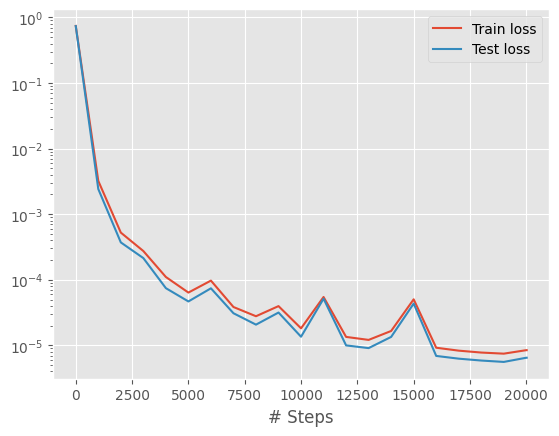

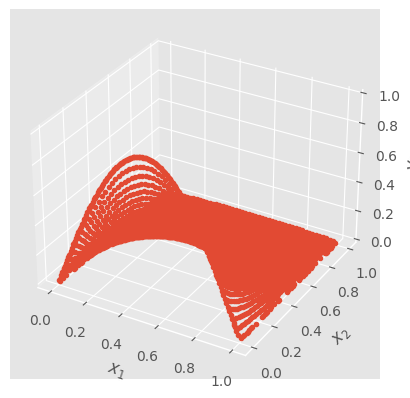

In [44]:
dde.saveplot(loss_history,train_state,issave=True,isplot=True)